## 1. Implement GMM method using EM algorithm (70 points)
### should return $\pi_k$, $\mu_k$, $\Sigma_k$

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy.io import loadmat as sploadmat
from scipy.stats import multivariate_normal
from scipy.stats import norm

In [18]:
class GaussianMixtureModel:
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations

        #parameters
        self.pi=[]
        self.mu=[]
        self.sigma=[]
   
    def fit(self, X):

        # Initialize the parameters and implement E and M steps
        arrays=np.array_split(X, self.k)


        #Initialize pi parameters
        self.pi = [len(arr)/len(X) for arr in arrays ]
        self.mu = [[arr[:,0].mean(),arr[:,1].mean()] for arr in arrays ]
        self.sigma = [ np.cov(arr[:,0],arr[:,1]) for arr in arrays ]

        # E step
        for i in range(1,self.max_iterations):
            numerators = np.array([ self.pi[j]*multivariate_normal(self.mu[j],self.sigma[j]).pdf(X) for j in range(self.k)]).T
            resp = np.array([ numerators[:,j]/numerators.sum(axis=1) for j in range(self.k)]).T

        # M-step
        Nk=resp.sum(axis=0)

        # Updating the params
        self.pi=Nk/X.shape[0]
        self.mu=((X.T@resp)/Nk.T).T
        diffs=X[:,None,:]-self.mu
        self.sigma=np.einsum('nij,nik->ijk', diffs, diffs * resp[:, :, None])/Nk[:, None, None]
        
        return self.pi, self.mu, self.sigma
    
    
    def predict(self, X):
        # Find the cluster probabilities
        probabilities = np.zeros((X.shape[0], self.k))
        
        probs = [[self.pi[i]*multivariate_normal(self.mu[i],self.sigma[i]).pdf(X) for i in range(self.k)]]

        return np.argmax(probs, axis=1) # Return the labels

## 2. Load X.mat, and estimate parameters: $\pi_k$, $\mu_k$, $\Sigma_k$ (10 points)


In [19]:
X = sploadmat("X.mat")["X"]

print("First 5 values of X: ", X[:5])

model = GaussianMixtureModel(k=3)
pi, mu, sigma = model.fit(X)
print(f"Pi:{pi},\nMean: {mu},\nSigma: {sigma}")

First 5 values of X:  [[ 1.9562784   2.09485882]
 [ 0.92421992  2.53823803]
 [ 2.83124931  2.34614454]
 [-1.54393127  2.74682383]
 [ 1.85996195  1.47957649]]
Pi:[0.34551005 0.35826854 0.29622141],
Mean: [[ 0.74151161  1.22598108]
 [-2.01062088 -4.09250353]
 [ 1.08230208 -2.067809  ]],
Sigma: [[[ 2.60181408e+00  1.27756909e+00]
  [ 1.27756909e+00  3.47155303e+00]]

 [[ 9.77829990e-01 -3.11019695e-03]
  [-3.11019695e-03  8.79796822e-01]]

 [[ 4.68564400e-01  4.61142422e-02]
  [ 4.61142422e-02  1.95838296e+00]]]


## 3. Determine the labels of each data using probability of each data: $P(x)$ (10 points)
### $[\pi_1 \mathcal{N}(x_i|\mu_1, \Sigma_1), \pi_2 \mathcal{N}(x_i|\mu_2, \Sigma_2), \pi_3 \mathcal{N}(x_i|\mu_3, \Sigma_3)]$

In [20]:
model = GaussianMixtureModel(k = 3, max_iterations=1000)
model.fit(X)
preds = model.predict(X)
np.unique(preds, return_counts=True)

(array([0, 1, 2], dtype=int64), array([567, 688, 545], dtype=int64))

## 4. Plot the results of three clusters (10 points)

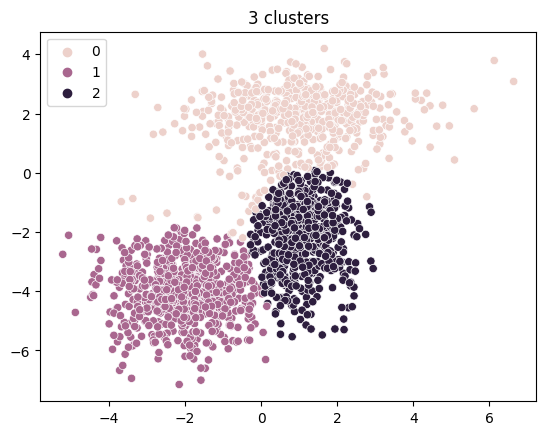

In [24]:
plt.title("3 clusters")
sns.scatterplot(x = X[:, 0], y= X[:, 1],  hue=preds[0]);

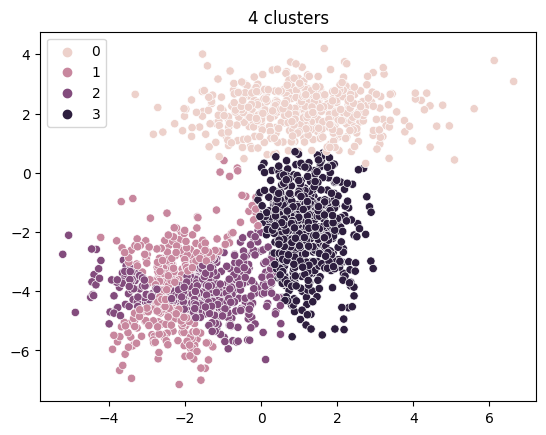

In [25]:
plt.title("4 clusters")
model = GaussianMixtureModel(k = 4, max_iterations=1000)
model.fit(X)
preds = model.predict(X)
np.unique(preds, return_counts=True)

sns.scatterplot(x = X[:, 0], y= X[:, 1], hue=preds[0]);

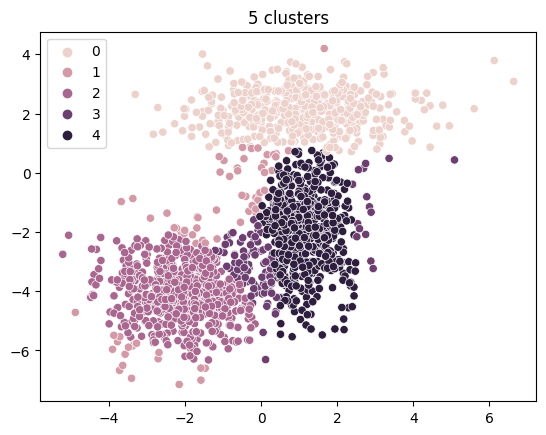

In [26]:
plt.title("5 clusters")
model = GaussianMixtureModel(k = 5, max_iterations=1000)
model.fit(X)
preds = model.predict(X)
np.unique(preds, return_counts=True)

sns.scatterplot(x= X[:, 0], y= X[:, 1], hue = preds[0]);

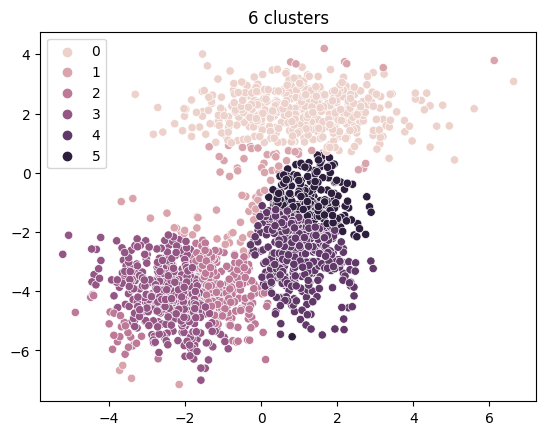

In [27]:
plt.title("6 clusters")
model = GaussianMixtureModel(k = 6, max_iterations=1000)
model.fit(X)
preds = model.predict(X)
np.unique(preds, return_counts=True)

sns.scatterplot(x = X[:, 0], y= X[:, 1], hue = preds[0]);

As it can be observed that the overlapping increases as the number of cluster increases, so we can choose 3 or 4 for number of clusters (K).